In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm, dates
import glob
import os
import nltk
from nltk.corpus import stopwords
import re
import string
import itertools
import unidecode

## Upload data

In [75]:
path = r'../raw_data/dilma/' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [76]:
df = df.drop_duplicates(subset="content",keep="first")
df=df[df["lang"]=="pt"]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head(5)

,Unnamed: 0,url,content,id,reply_count,retweet_count,like_count,quote_count,lang,username,...,followers_count,friends_count,location,protected,profile_img,query,crawled_date,VADAR,compound,sentiment
date,,,,,,,,,,,,,,,,,,,,,
2014-05-11 13:42:19,0,https://twitter.com/dilmabr/status/46548706747...,"Uma data para marcar o reconhecimento, o carin...",465487067477463040,70,147,174,0,pt,dilmabr,...,6478656,261,Brasil,False,https://pbs.twimg.com/profile_images/105474933...,(from:dilmabr),2022-06-02,"{'neg': 0.077, 'neu': 0.67, 'pos': 0.254, 'com...",0.5719,pos
2014-05-11 13:41:51,1,https://twitter.com/dilmabr/status/46548695037...,"Como filha, mãe e avó, sei como cada uma de vo...",465486950376673280,74,147,186,0,pt,dilmabr,...,6478656,261,Brasil,False,https://pbs.twimg.com/profile_images/105474933...,(from:dilmabr),2022-06-02,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2014-05-11 13:41:37,2,https://twitter.com/dilmabr/status/46548688927...,Hoje envio um abraço cheio de alegria a todas ...,465486889278246913,54,194,220,0,pt,dilmabr,...,6478656,261,Brasil,False,https://pbs.twimg.com/profile_images/105474933...,(from:dilmabr),2022-06-02,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.7845,pos
2014-08-09 20:08:07,3,https://twitter.com/dilmabr/status/49819906259...,As imagens da agenda com @padilhando hj em Osa...,498199062597087233,45,100,133,0,pt,dilmabr,...,6478656,261,Brasil,False,https://pbs.twimg.com/profile_images/105474933...,(from:dilmabr),2022-06-02,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2014-08-09 13:20:06,4,https://twitter.com/dilmabr/status/49809638318...,"Para quem não está em Osasco, a caminhada será...",498096383187255296,35,40,68,0,pt,dilmabr,...,6478656,261,Brasil,False,https://pbs.twimg.com/profile_images/105474933...,(from:dilmabr),2022-06-02,"{'neg': 0.218, 'neu': 0.632, 'pos': 0.149, 'co...",-0.0516,neg


## Number of tweets by type of sentiments

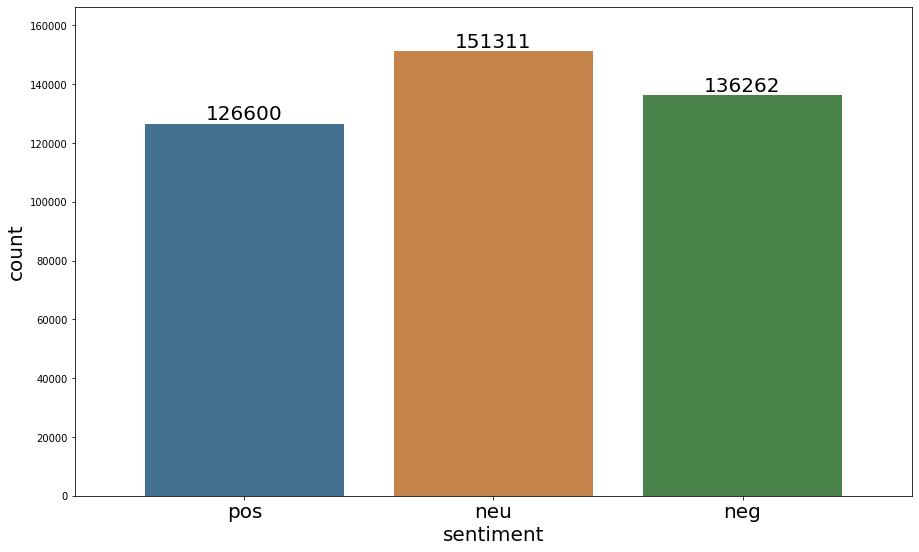

In [19]:
plt.figure(figsize=(15,9))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
ax = sns.countplot(x='sentiment', data=df, dodge=False, saturation=0.5 )
ax.bar_label(ax.containers[0], fontsize=20)
#ax.set_title('Number of tweets by type of sentiments',fontsize=28, fontweight='bold')
ax.margins(0.1)
plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_tweetTotalbySentiments.png', dpi=180)


## Daily Number of Tweets

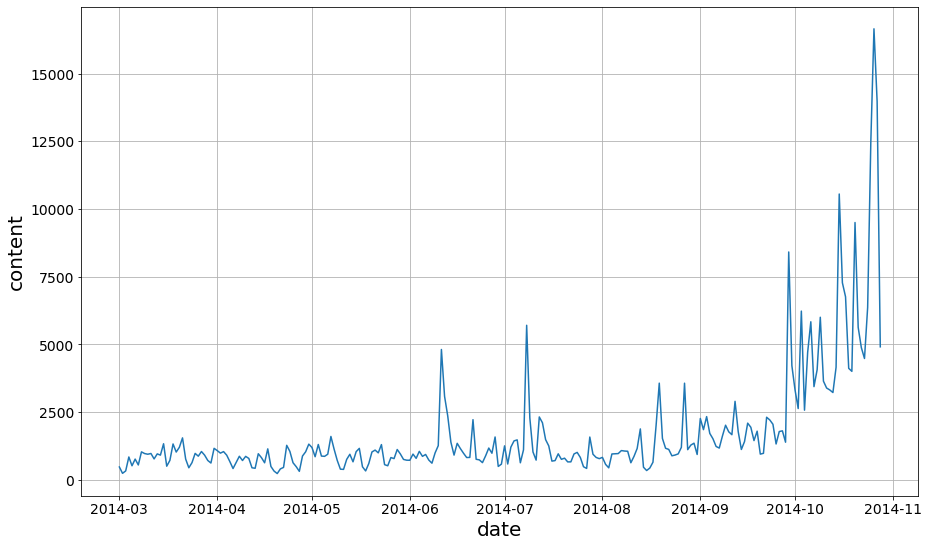

In [41]:
df_daily = df.resample('D').count()
df_daily.reset_index(inplace=True)
plt.figure(figsize=(15,9))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
plt.grid()
ax = sns.lineplot(x='date', y='content', data=df_daily)
plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_numberDailyTweet.png', dpi=180)
#ax.set_title('Daily Number of Tweets ',fontsize=28, fontweight='bold')
#df_daily

## Tweets per user

In [42]:
count_posts_by_user = df.groupby('username').agg(post_count=('username', 'count')).reset_index()
count_posts_by_user = count_posts_by_user.groupby('post_count').agg(users_count=('username', 'count')).reset_index()
bins = [-1, 5, 25, 70, 100]
labels = ["less than 5%","between 5-25%", "between 25-70%", "more than 70%"]

data_per = count_posts_by_user.groupby('post_count')\
.agg(
    percentage = ('users_count', lambda p: int(p / count_posts_by_user['users_count'].sum() * 100)))\
.reset_index()

data_per['percentage_cat'] = pd.cut(data_per['percentage'], bins=bins, labels=labels)

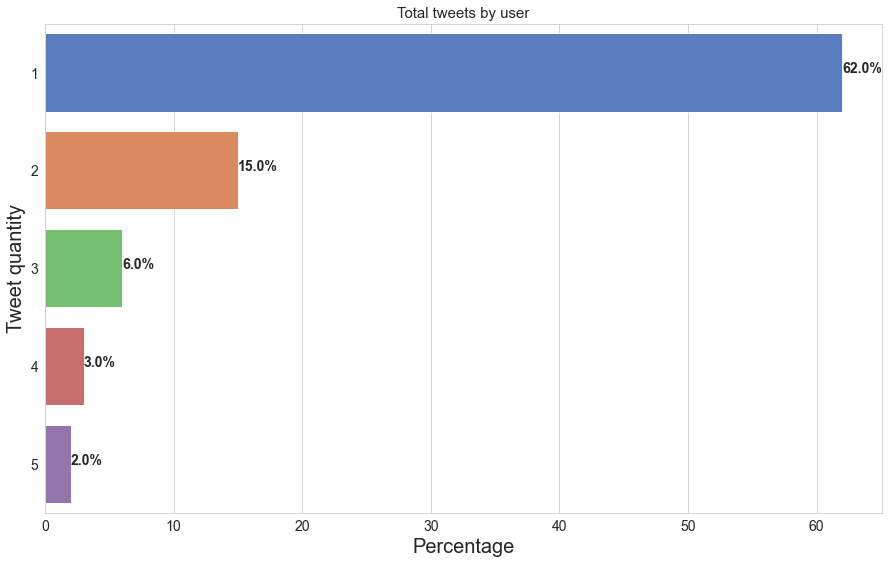

In [49]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(x="percentage", y="post_count", data=data_per.head(5), ci=None, palette="muted",orient='h' )
ax.set_title("Total tweets by user", fontsize=15)
ax.set_xlabel ("Percentage")
ax.set_ylabel ("Tweet quantity")
#ax.bar_label(ax.containers[0], fontsize=12)
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold',fontsize=14 )

plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_avgTweetsbyUser.png', dpi=180)

## Users tweeted most 

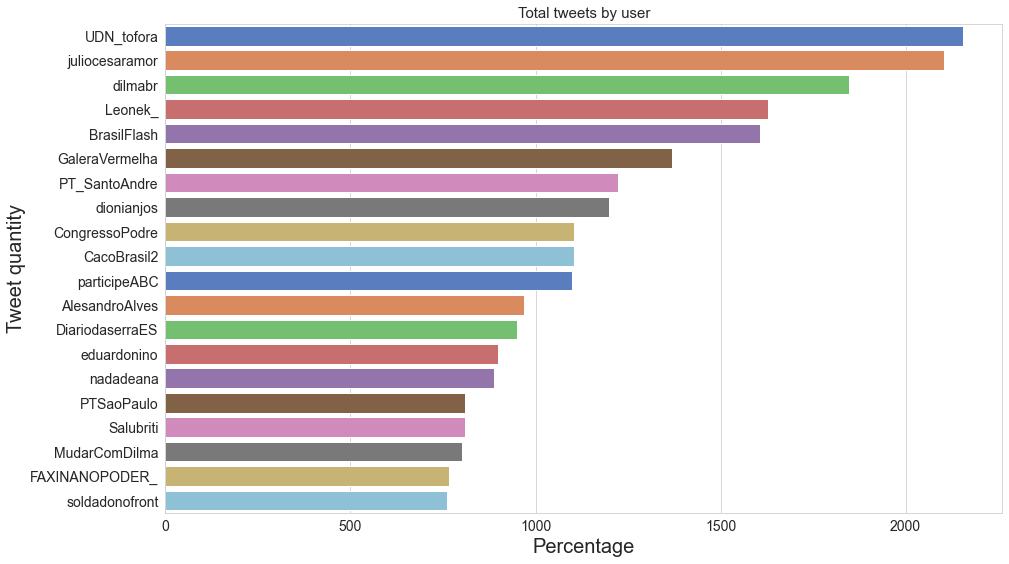

In [50]:
a=df['username'].value_counts().head(20)
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(15,9))
ax = sns.barplot(x=a, y=a.index, ci=None, palette="muted",orient='h' )
ax.set_title("Total tweets by user", fontsize=15)
ax.set_xlabel ("Percentage")
ax.set_ylabel ("Tweet quantity")
plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_userTweetedMost.png', dpi=180)

## Quantidade de likes pelo sentimento 

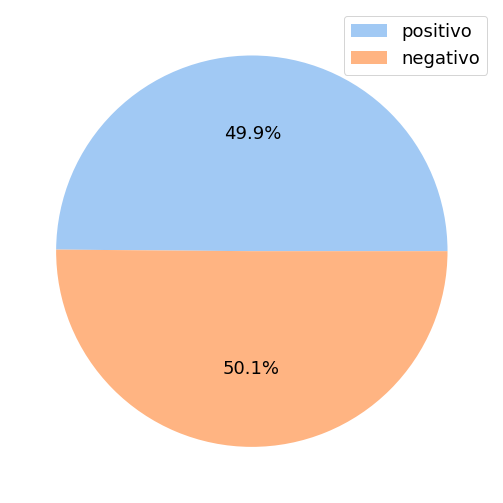

In [77]:
df = df.loc[(df['sentiment']=='pos')| (df['sentiment']=='neg')]
df_likes = df.groupby(['sentiment'])['like_count'].agg('sum')
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = 18
plt.pie(df_likes, colors = colors, autopct='%.1f%%')
#plt.title('A proporção de likes pelos sentimentos', fontsize=20)
plt.legend(labels=['positivo','negativo'], fontsize=18)
plt.setp({'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_likesForSentiments.png', dpi=180)
plt.show()

## Quantidade de respostas pelos sentimentos 

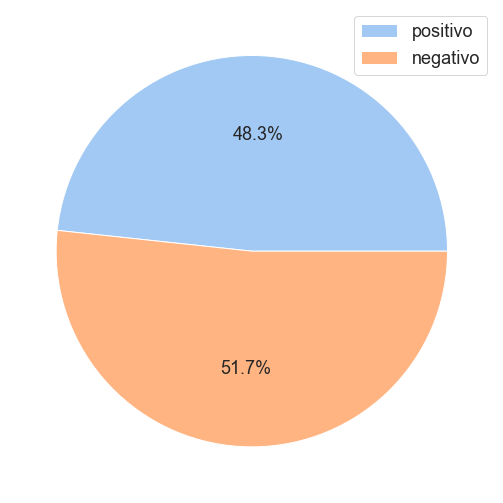

In [69]:
df_likes = df.groupby(['sentiment'])['reply_count'].agg('sum')
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = 18
plt.pie(df_likes, colors = colors, autopct='%.1f%%')
#plt.title('A quantidade de respostas recebidas pelos sentimentos', fontsize=20)
plt.legend(labels=['positivo','negativo'])
plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_replyForSentiments.png', dpi=180)
plt.show()

## Quantidade de retweets pelos sentimentos 

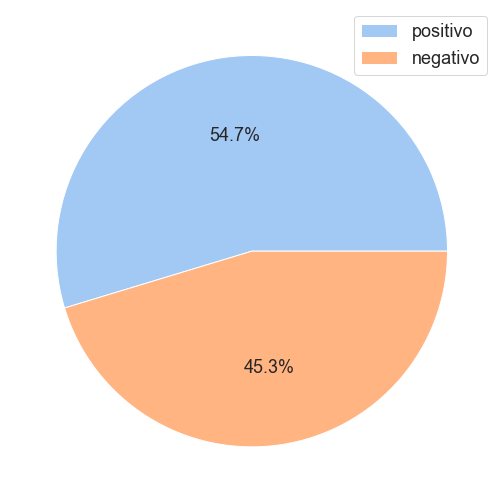

In [71]:
df_likes = df.groupby(['sentiment'])['retweet_count'].agg('sum')
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = 18
plt.pie(df_likes, colors = colors, autopct='%.1f%%')
#plt.title('A quantidade de retweets pelos sentimentos', fontsize=20)
plt.legend(labels=['positivo','negativo'])
plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_retweetForSentiments.png', dpi=180)
plt.show()

## Analise de sentimentos durante campanha eleitoral 

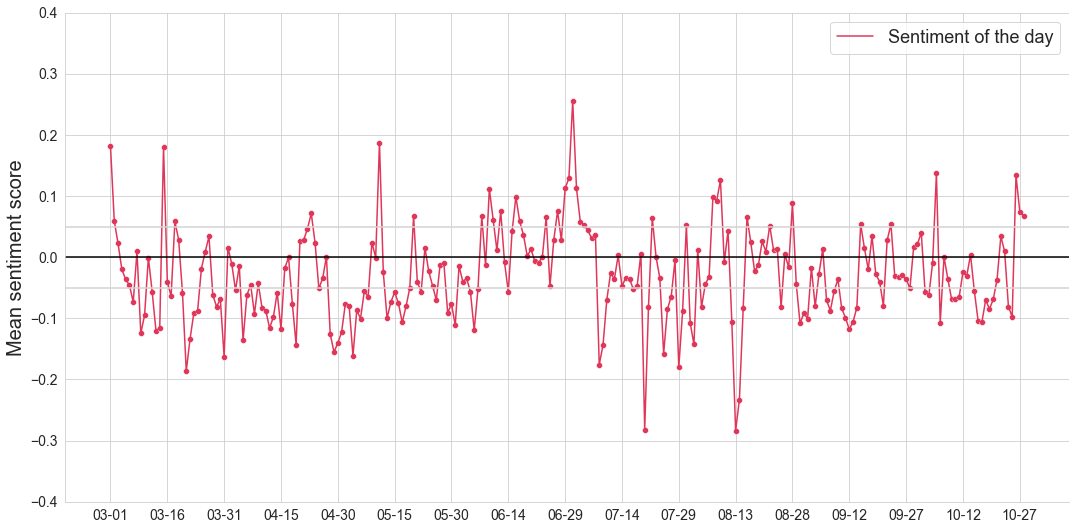

In [77]:
df.reset_index(inplace=True)
# create additional date time columns
df['created_at_r']=df['date'].dt.strftime('%Y-%m-%d %H')
df['created_at_r2']=df['date'].dt.strftime('%m-%d')
compound_mean_by_day = df.groupby('created_at_r2')['compound'].mean().sort_index()
compound_mean_by_hour = df.groupby('created_at_r')['compound'].mean().sort_index()

barcolors = ['#87B88C','#9ED2A1','#E7E8CB','#48A0C9','#2A58A1','#2E8B55','#DF3659','Grey']
barstyle = {"edgecolor":"black", "linewidth":1}
fig, lineax = plt.subplots(1,1, figsize=(18,9), gridspec_kw={'hspace':0.05})
#lineax = ax[0]
sns.lineplot(x=compound_mean_by_day.index, y=compound_mean_by_day.values, color=barcolors[6], ax=lineax, label='Sentiment of the day')
sns.scatterplot(x=compound_mean_by_day.index, y=compound_mean_by_day.values, color=barcolors[6], ax=lineax)
lineax.set_ylim([-0.4, 0.4])
lineax.set_ylabel('Mean sentiment score')
lineax.set_xlabel('')
#plt.xticks(rotation=90)
lineax.set_xticks(range(0, len(compound_mean_by_day.index), 15))
lineax.axhline(y=0, color='k', linestyle='-')
lineax.axhline(y=0.05, color='lightgrey', linestyle='-')
lineax.axhline(y=-0.05, color='lightgrey', linestyle='-')
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
plt.savefig('../twitterelectionbr/interface/frontend/static/dilma_sentimentsOvertime.png', dpi=180)

In [3]:
def clean_tweet(tweet):

    tweet = tweet.lower()
    tweet = re.sub(r"\d+", "", tweet)
    tweet = re.sub(r'\@[a-zA-Z0-9]*', ' ', tweet) # remove username start with @
    tweet = re.sub(r'https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweet) # remove link in the tweet
    tweet = re.sub(r'\$[a-zA-Z0-9]*', ' ', tweet) # remove the variable start with $
    #tweet = re.sub('[^a-zA-Z\']', ' ', tweet)
    for punctuation in new_punc: # remove panctuations 
            tweet = tweet.replace(punctuation, '')
    tweet = ' '.join( [w for w in tweet.split() if len(w)>1] ) #remove one letter words
    tweet = ''.join(c[0] for c in itertools.groupby(tweet)) #remove duplicated letters
    tweet = unidecode.unidecode(tweet)  # normalizar as letras com acentos 
    tweet = ' '.join(word for word in tweet.split(' ') if word not in stop_words) # remove stopwords
    
    return tweet 

new_punc = list(string.punctuation)
stop_words = stopwords.words('portuguese')
#stop_words.remove('não')
addicional = [
            'd', 'ta', 'q', 'tah', 'tao', 'eh', 'vc', 'voce','vai','lula','esa','ese','iso','sobre','agora','nao',
            'pq', 'quede', 'mto', 'mt', 'bj', 'bjs','vcs','bb','pra','ai','presidente','presidenta','aecio',
            'b', 'sao', 'axo', 'mano', 'ae', 'neh', 'ai','la','ja','so', 'rousef', 'brasil','#dilma',
            'porque', 'ne', 'no', 'iai', 'tbm', 'msm', 'jah', 'yahoo', 'yahoobr','rt', 'dilma']
stop_words.extend(addicional)
df['content'] = df['content'].astype(str)
df["clean_content"]=df["content"].apply(lambda x:clean_tweet(x))
df = df.drop_duplicates(subset="clean_content",keep="first")

## WordCloud of Positive and Negative tweets

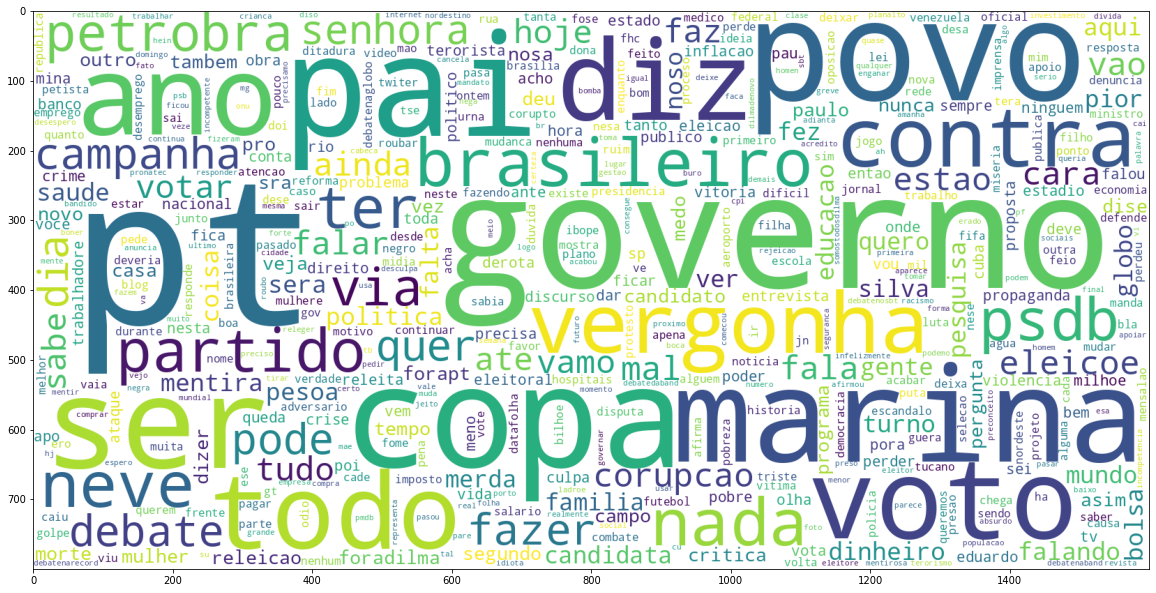

In [4]:
from wordcloud import WordCloud
data_neg = df.loc[df['sentiment']=='neg', 'clean_content']
neg_sentences=[]
for sentences in data_neg:
    neg_sentences.append(sentences)

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800, background_color='white',
               collocations=False).generate(" ".join(neg_sentences))
wc.to_file('../twitterelectionbr/interface/frontend/static/dilma_wordCloudNegativo.png')
plt.imshow(wc)

In [146]:
def word_cloud(content):

    def black_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
      return("hsl(0,100%, 1%)")

    wordcloud = WordCloud(#font_path = '/Library/Fonts/Arial Unicode.ttf', 
                        background_color="white", 
                        width=3000, 
                        height=2000, 
                        max_words=500).generate(content)
    wordcloud.recolor(color_func = black_color_func)
    plt.figure(figsize=[15,10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    # plot the wordcloud
    plt.imshow(wordcloud, interpolation="bilinear")
    # remove plot axes
    plt.axis("off")

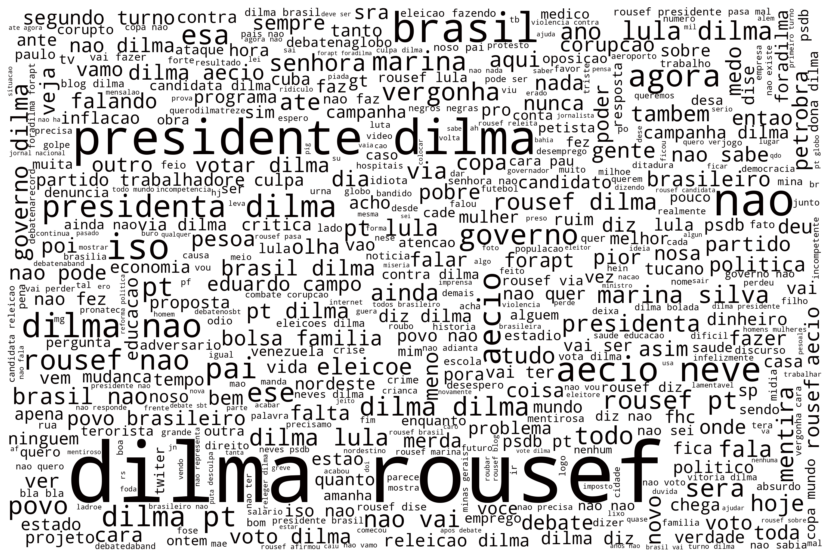

In [149]:
word_cloud(" ".join(data_neg))

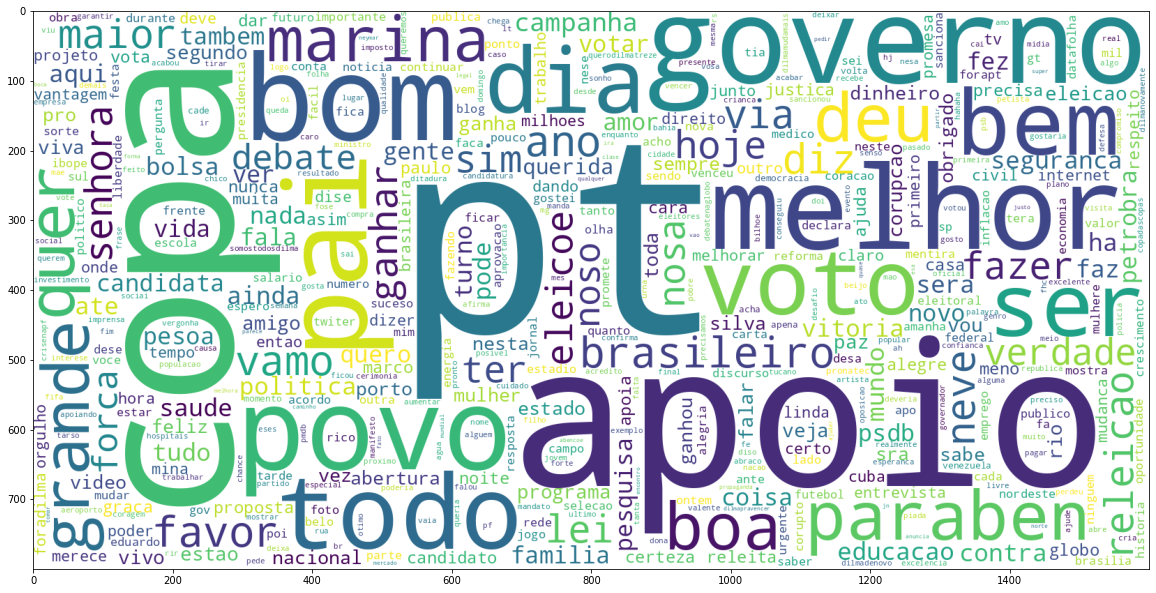

In [5]:
from wordcloud import WordCloud
data_pos = df.loc[df['sentiment']=='pos', 'clean_content']
pos_sentences=[]
for sentences in data_pos:
    pos_sentences.append(sentences)
        

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800, background_color='white',
               collocations=False).generate(" ".join(pos_sentences))
wc.to_file('../twitterelectionbr/interface/frontend/static/dilma_wordCloudPositivo.png')
plt.imshow(wc)

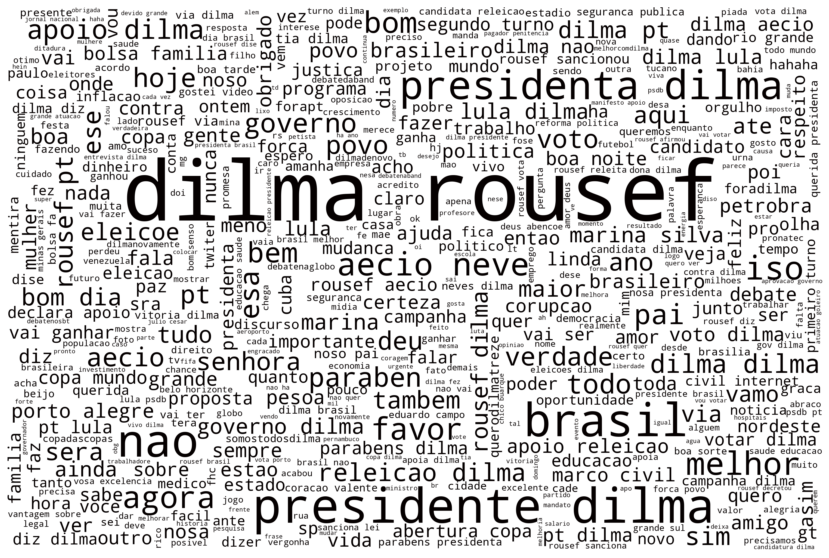

In [151]:
word_cloud(" ".join(pos_sentences))

# Gender and Location Database

In [73]:
path = r'../raw_data/last_db/bolsonaro.csv' # use your path
df = pd.read_csv(path)
df = df.drop_duplicates(subset="username",keep="first")

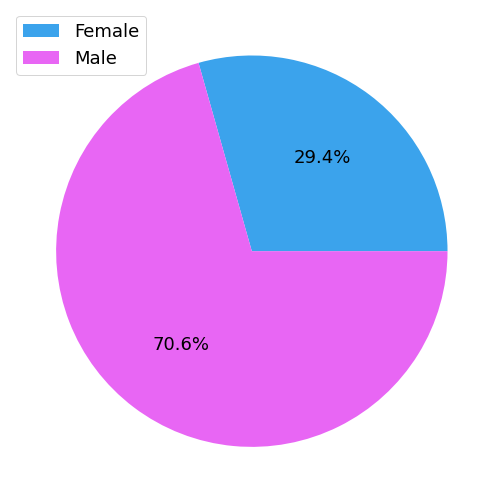

In [74]:
df_likes = df.groupby(['gender'])['username'].agg('count')
colors = sns.color_palette("husl")[4:7]
plt.figure(figsize=(15,9))
plt.rcParams['font.size'] = 18
plt.pie(df_likes, colors = colors, autopct='%.1f%%')
#plt.title('A proporção de likes pelos sentimentos', fontsize=20)
plt.legend(labels=['Female','Male'], fontsize=18)
plt.setp({'color':'white', 'weight':'bold', 'fontsize':16})
plt.savefig('../twitterelectionbr/interface/frontend/static/bolsonaro_gender.png', dpi=180)
plt.show()

In [38]:
df_likes = df.groupby(['gender']).agg('count')

In [39]:
df_likes

,Unnamed: 0.1,Unnamed: 0,url,date,content,id,reply_count,retweet_count,like_count,quote_count,...,location,protected,profile_img,query,crawled_date,lat,long,compound,sentiment,gender_confidence_score
gender,,,,,,,,,,,,,,,,,,,,,
Female,25001,25001,25001,25001,25001,25001,25001,25001,25001,25001,...,17769,25001,25001,25001,25001,25001,25001,25001,25001,25001
Male,60805,60805,60805,60805,60805,60805,60805,60805,60805,60805,...,42496,60805,60801,60805,60805,60805,60805,60805,60805,60802
